In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [3]:
data = pd.read_csv('data/advertising_TV.csv')

In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [20]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
data.describe

<bound method NDFrame.describe of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

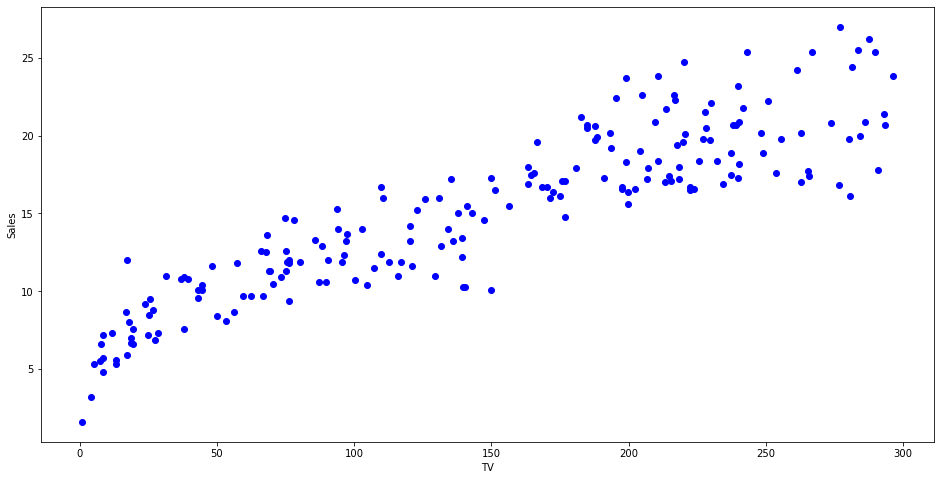

In [22]:
plt.figure(figsize=(16, 8))
plt.scatter(data['TV'], 
            data['Sales'],
            c = 'blue')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [6]:
x = data['TV'].values.reshape(-1,1)
y = data['Sales'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(x,y)


LinearRegression()

In [7]:
print(reg.coef_[0][0])
print(reg.intercept_[0])

print("the linear model is Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

0.05546477046955886
6.9748214882298925
the linear model is Y = 6.9748 + 0.055465X


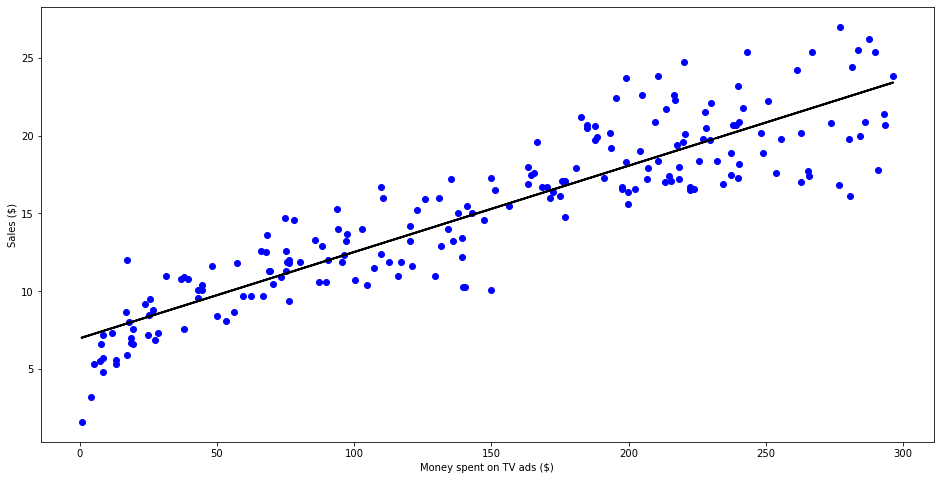

In [9]:
predictions = reg.predict(x)

plt.figure(figsize=(16,8))
plt.scatter(
    data['TV'],
    data['Sales'],
    c='blue'
)

plt.plot(
    data['TV'],
    predictions,
    c='black',
    linewidth=2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [11]:
X = data['TV']
y = data['Sales']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           7.93e-74
Time:                        22:05:47   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.0